<a href="https://colab.research.google.com/github/1kaiser/-DEM-30m-90m-srtm/blob/main/dem_%F0%9F%97%BA%EF%B8%8F_3d_elevation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **🦉** introduced from >>>  [Earth Data Analytics](https://www.earthdatascience.org/tutorials/get-slope-aspect-from-digital-elevation-model/) && [elevation 1.1.3: Python script to download global terrain digital elevation models, SRTM 30m DEM and SRTM 90m DEM. ](https://pypi.org/project/elevation/)

In [1]:
pip install GDAL Matplotlib numpy elevation richdem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 7.4 MB/s 


In [2]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 
import os
import richdem as rd

In [19]:
#@title Enter Left Bottom (lat,long) Right Top (lat,long) { vertical-output: true }
left_bottom_latitude = 31 #@param {type:"raw"}
left_bottom_longutude = 76 #@param {type:"raw"}
Right_Top_lattitude = 33 #@param {type:"raw"}
Right_Top_Longitude = 78 #@param {type:"raw"}
#90 m SRTM
!eio --product SRTM3 clip -o 90m-DEM.tif --bounds ${left_bottom_latitude} ${left_bottom_longutude} ${Right_Top_lattitude}  ${Right_Top_Longitude}
#30 m SRTM
!eio clip -o 30m-DEM.tif --bounds ${left_bottom_latitude} ${left_bottom_longutude} ${Right_Top_lattitude} ${Right_Top_Longitude}

make: Entering directory '/root/.cache/elevation/SRTM3'
curl -s -o spool/srtm_37_11.zip.temp https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_37_11.zip && mv spool/srtm_37_11.zip.temp spool/srtm_37_11.zip
unzip -qq -d spool spool/srtm_37_11.zip srtm_37_11.tif 2>/dev/null || touch spool/srtm_37_11.tif
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/srtm_37_11.tif cache/srtm_37_11.tif 2>/dev/null || touch cache/srtm_37_11.tif
rm spool/srtm_37_11.zip spool/srtm_37_11.tif
make: Leaving directory '/root/.cache/elevation/SRTM3'
make: Entering directory '/root/.cache/elevation/SRTM3'
gdalbuildvrt -q -overwrite SRTM3.vrt cache/srtm_37_11.tif cache/srtm_38_12.tif
make: Leaving directory '/root/.cache/elevation/SRTM3'
make: Entering directory '/root/.cache/elevation/SRTM3'
cp SRTM3.vrt SRTM3.ce6b816b9dfd45ae98d22358c4b799a2.vrt
make: Leaving directory '/root/.cache/elevation/SRTM3'
make: Entering directory '/root/.cache/elevation/SRTM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


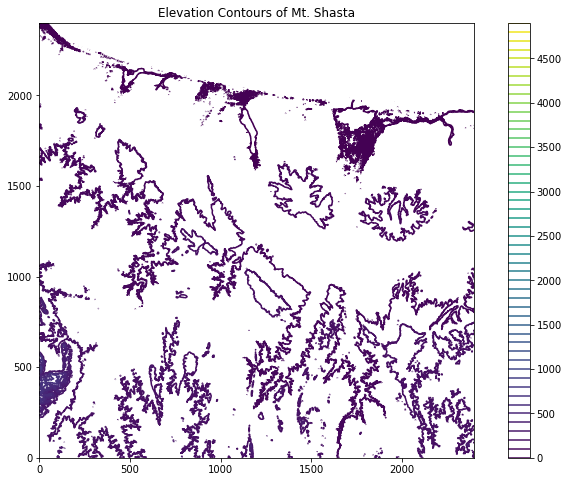

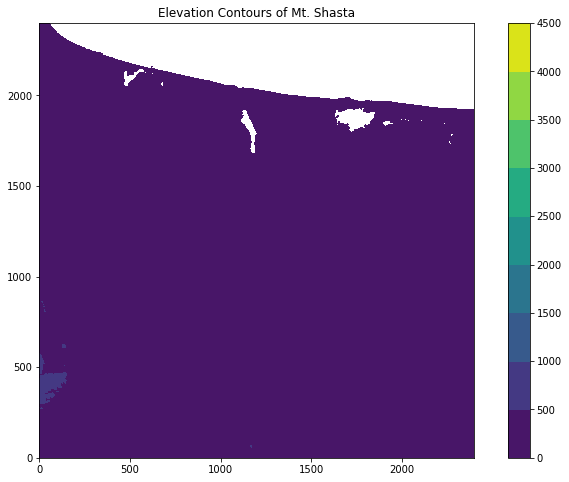

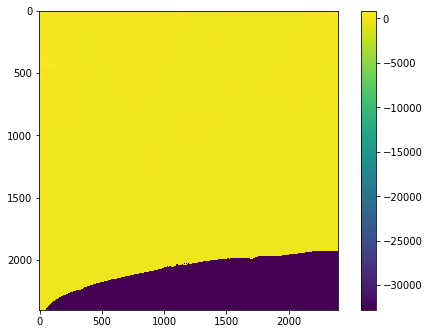

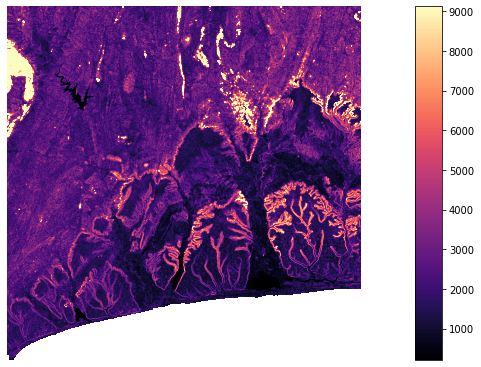

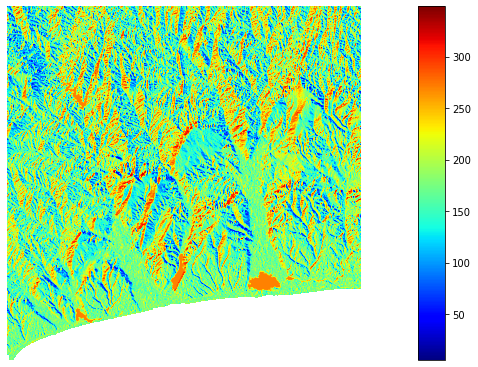

In [20]:
#@title Default title text { vertical-output: true }
filename = "90m-DEM.tif" #@param ["30m-DEM.tif", "90m-DEM.tif"] {allow-input: true}
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan


#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

matplotlib.rcParams['figure.figsize'] = (8, 5.5)

dem_path = os.path.join(os.getcwd(), filename)

shasta_dem = rd.LoadGDAL(dem_path)
plt.imshow(shasta_dem, interpolation='none')
plt.colorbar()
plt.show()


slope = rd.TerrainAttribute(shasta_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

aspect = rd.TerrainAttribute(shasta_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()